In [2]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test characteristics
1. BR motor starts first
2. BR ENC nearly static offset over BL ENC
3. ENC's seem to be independent of GPIO, if the BR motor is on BL ENC, BL ENC shows same behaviour

Front Motors:
1. FL starts first
2. FR ENC doing the same thing as BR.  Some kind of NVIC problem for BR? (especially starting at 60 'speed')

In [3]:
motor_table = pd.read_csv("rear_motors.csv", names=['unixTime', 'dutyCycle', 'BL', 'BR'])
front_table = pd.read_csv("front_motors.csv", names=['unixTime', 'dutyCycle', 'FL', 'FR'])
motor_table['FL'] = front_table.FL
motor_table['FR'] = front_table.FR

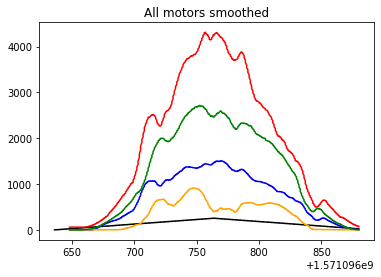

In [4]:
plt.plot(motor_table.unixTime, motor_table.dutyCycle, color='black')
plt.plot(motor_table.unixTime, motor_table.BL.rolling(window=25).mean(), color='blue')
plt.plot(motor_table.unixTime, motor_table.BR.rolling(window=25).mean(), color='red')
plt.plot(motor_table.unixTime, motor_table.FL.rolling(window=25).mean(), color='orange')
plt.plot(motor_table.unixTime, motor_table.FR.rolling(window=25).mean(), color='green')
plt.title('All motors smoothed')
plt.show()

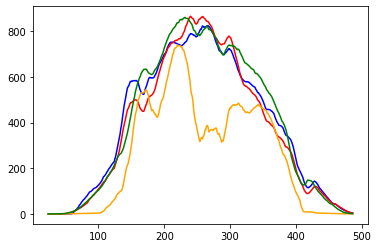

In [5]:
#rescale to a new range

def rescale(values, old_min, old_max, new_min, new_max):
    old_range = old_max - old_min
    new_range = new_max - new_min
    new_values = []
    for value in values:
        new_values.append((((value - old_min) * new_range) / old_range) + new_min)
    return new_values

bl_scaled = rescale(motor_table.BL.rolling(window=25).mean(), min(motor_table.BL), max(motor_table.BL), 0, 1000)
br_scaled = rescale(motor_table.BR.rolling(window=25).mean(), min(motor_table.BR), max(motor_table.BR), 0, 1000)
fl_scaled = rescale(motor_table.FL.rolling(window=25).mean(), min(motor_table.FL), max(motor_table.FL), 0, 1000)
fr_scaled = rescale(motor_table.FR.rolling(window=25).mean(), min(motor_table.FR), max(motor_table.FR), 0, 1000)

plt.plot(bl_scaled, color='blue')
plt.plot(br_scaled, color='red')
plt.plot(fl_scaled, color='orange')
plt.plot(fr_scaled, color='green')
plt.show()

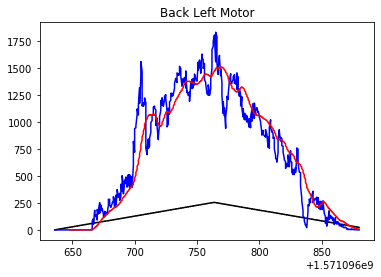

In [6]:
plt.plot(motor_table.unixTime, motor_table.dutyCycle, color='black')
plt.plot(motor_table.unixTime, motor_table.BL, color='blue')
plt.plot(motor_table.unixTime, motor_table.BL.rolling(window=25).mean(), color='red')
plt.title('Back Left Motor')
plt.show()

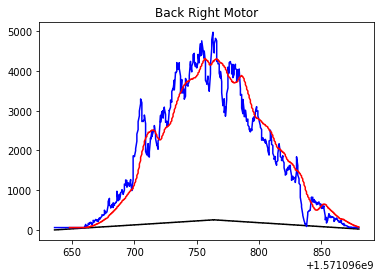

In [7]:
plt.plot(motor_table.unixTime, motor_table.dutyCycle, color='black')
plt.plot(motor_table.unixTime, motor_table.BR, color='blue')
plt.plot(motor_table.unixTime, motor_table.BR.rolling(window=25).mean(), color='red')
plt.title('Back Right Motor')
plt.show()

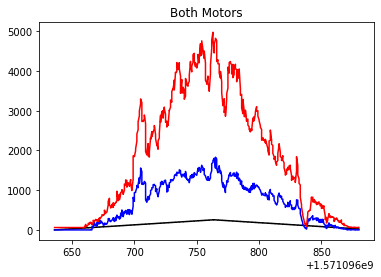

In [8]:
plt.plot(motor_table.unixTime, motor_table.dutyCycle, color='black')
plt.plot(motor_table.unixTime, motor_table.BL, color='blue')
plt.plot(motor_table.unixTime, motor_table.BR, color='red')
plt.title('Both Motors')
plt.show()

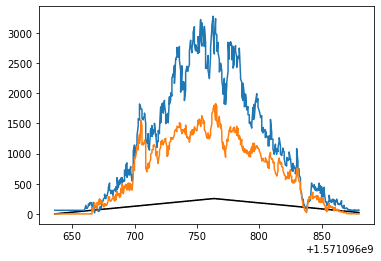

In [9]:
diffs = motor_table['BR'] - motor_table['BL']
plt.plot(motor_table.unixTime, motor_table.dutyCycle, color='black')
plt.plot(motor_table.unixTime, diffs)
plt.plot(motor_table.unixTime, motor_table.BL)
plt.show()

^^Looks like when I take the difference, the motors diverge around the 80/255 duty cycle range and reconverge at the 175/255 range.

Also looks like there is an interaction that is a function of the duty cycle involved.

In [10]:
scaling_factor = (motor_table.BR - motor_table.BL) / motor_table.dutyCycle
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(scaling_factor)

0      60.000000
1      30.000000
2      20.000000
3      15.000000
4      12.000000
5      10.000000
6       8.571429
7       7.500000
8       6.666667
9       6.000000
10      5.454545
11      5.083333
12      4.615385
13      4.285714
14      4.000000
15      3.750000
16      3.529412
17      3.333333
18      3.157895
19      3.000000
20      2.904762
21      2.727273
22      2.608696
23      2.500000
24      2.400000
25      2.346154
26      2.222222
27      2.142857
28      2.068966
29      2.000000
30      1.935484
31      1.875000
32      1.818182
33      1.764706
34      1.742857
35      1.666667
36      1.621622
37      1.578947
38      1.538462
39      1.500000
40      1.463415
41      1.428571
42      1.395349
43      1.386364
44      1.333333
45      1.304348
46      1.276596
47      1.250000
48      1.469388
49      2.800000
50      1.862745
51      1.846154
52      1.754717
53      2.388889
54      2.981818
55      2.535714
56      3.245614
57      3.000000
58      3.2372

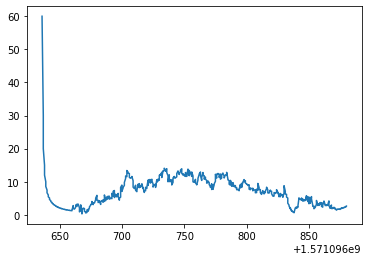

In [11]:
plt.plot(motor_table.unixTime, scaling_factor)
plt.show()